# LINEAR FITTING

#####  All algorithms were designed by Hyungjoo Kim and Dataset was provided at UCL

In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
# Class
# Iris Setosa for label 0, Iris Versicolour label 1, Iris Virginica for label 2
train_label = np.load('./IRIS/iris_train_labels.npy') # [2 1 1 0 2 2 2 0 1...] (96,)
train_samp = np.load('./IRIS/iris_train_samples.npy') # (96,4) sepal length, sepal width, petal length, petal width
val_label = np.load('./IRIS/iris_val_labels.npy')
val_samp = np.load('./IRIS/iris_val_samples.npy')

MNIST_train_label = np.load('./MNIST/mnist_train_labels.npy')
MNIST_train_samp = np.load('./MNIST/mnist_train_samples.npy')  # (44800, 28*28)
MNIST_val_label = np.load('./MNIST/mnist_val_labels.npy')
MNIST_val_samp = np.load('./MNIST/mnist_val_samples.npy')

**Task 1: Implement the normal equation solver function nsolve, which takes as input the matrix x and the target vector y and returns the optimized weights w.**

In [52]:
def normal_solver(X, y):
    if y.ndim == 1:
        y = np.transpose(y[np.newaxis])
        
    Xt = X.T
    Xtx = np.matmul(Xt, X)
    Xty = np.matmul(Xt, y)
    optimised_w = np.matmul(inv(Xtx), Xty)
    return optimised_w

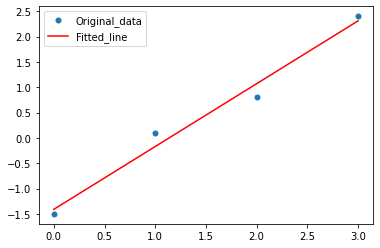

In [53]:
# Check the normal_sovler class is correct or not
X = np.array([0, 1, 2, 3])
y = np.array([-1.5, 0.1, 0.8, 2.4])
A = np.vstack([X, np.ones(len(X))]).T

gradient, bias = np.linalg.lstsq(A, y, rcond = None)[0]
k = plt.plot(X, y, 'o', label = 'Original_data', markersize = 5)
k = plt.plot(X, gradient*X + bias, 'r', label = 'Fitted_line')
k = plt.legend()
plt.show()

**Task 2: Implement lineFit(X,y) which should fit a linear function to the input data. Test your implementation on the following task: predict with linear fitting the petal length (cm) of the Iris dataset using the three remaining variables as inputs (sepal length (cm), sepal width (cm) and petal width (cm)). Report the L2 loss on the validation set and plot a graph showing the correlation between y and your prediction on the validation set.**

In [54]:
def Line_Fit(X, y):
    sepal_length = X[:, 0]
    sepal_width = X[:, 1]
    petal_width = X[:, 3]
    
    A = np.vstack([sepal_length, sepal_width, petal_width, np.ones(len(sepal_length))]).T
    w = normal_solver(A, y)
    estimated_y = np.squeeze(np.matmul(A, w))
    return estimated_y, w

In [55]:
petal_length = train_samp[:, 2]
estimated_petal_length, w_train = Line_Fit(train_samp, petal_length)

sepal_length_val = val_samp[:, 0]
sepal_width_val = val_samp[:, 1]
petal_length_val = val_samp[:, 2]
petal_width_val = val_samp[:, 3]

A1_val = np.vstack([sepal_length_val, sepal_width_val, petal_width_val, np.ones(len(sepal_length_val))]).T
estimated_petal_length_val = np.squeeze(np.matmul(A1_val, w_train))

# L2 loss function
L2_loss = np.sum((petal_length_val - estimated_petal_length_val)**2)
print("L2 loss on the validation set is", L2_loss)

L2 loss on the validation set is 2.2200391848040555


Correlation coefficient between the ground truth and estimated petal length is 0.9832465501836546


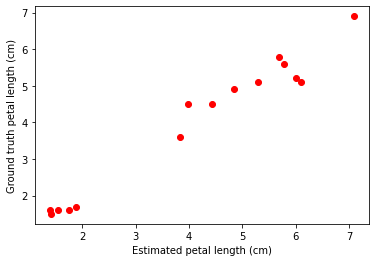

In [56]:
# Plot a graph showing the correlation between the ground truth and estimated values on the validation set
plt.scatter(estimated_petal_length_val, petal_length_val, color = 'red')
plt.xlabel("Estimated petal length (cm)")
plt.ylabel("Ground truth petal length (cm)")
correlation_coeff = np.corrcoef(estimated_petal_length_val, petal_length_val)
print("Correlation coefficient between the ground truth and estimated petal length is", correlation_coeff[0, 1])
plt.show()

**Task 3: Implement polyFit(X,y) which should fit a 2nd degree polynomial to the input data. Test your
implementation on the following task: predict with the polynomial the petal width (cm) of the Iris
dataset using the three remaining variables as inputs (sepal length (cm), sepal width (cm), petal length
(cm), petal width (cm)). The 2nd degree polynomial should consider all possible pairwise terms, i.e.
w1x
2 + w2xy + w3y
2 + w4x + w5y + w6 in the case of two input variables x and y. Report the L2 loss
on the validation set and plot a graph showing the correlation between y and your prediction on the
validation set.**

In [57]:
def Poly_Fit(X, y):
    x1 = X[:, 0]   # sepal_length
    x2 = X[:, 1]   # sepal_width
    x3 = X[:, 2]   # petal_length
    x1x1 = x1 * x1
    x2x2 = x2 * x2
    x3x3 = x3 * x3
    x1x2 = x1 * x2
    x2x3 = x2 * x3
    x1x3 = x1 * x3
    
    A = np.vstack([x1x1, x2x2, x3x3, x1x2, x2x3, x1x3, x1, x2, x3, np.ones(len(x1))]).T
    w = normal_solver(A, y)
    estimated_y = np.squeeze(np.matmul(A, w))
    return estimated_y, w

In [58]:
# Set x, y and estimated parameters
petal_width = train_samp[:, 3]
estimated_petal_width, w_train = Poly_Fit(train_samp, petal_width)

sepal_length_val = val_samp[:, 0]
sepal_width_val = val_samp[:, 1]
petal_length_val = val_samp[:, 2]
petal_width_val = val_samp[:, 3]
x1x1_val = sepal_length_val * sepal_length_val
x2x2_val = sepal_width_val * sepal_width_val
x3x3_val = petal_length_val * petal_length_val
x1x2_val = sepal_length_val * sepal_width_val
x2x3_val = sepal_width_val * petal_length_val
x1x3_val = sepal_length_val * petal_length_val

A_val = np.vstack([x1x1_val, x2x2_val, x3x3_val, x1x2_val, x2x3_val, x1x3_val,
                   sepal_length_val, sepal_width_val, petal_length_val, np.ones(len(x1x1_val))]).T
estimated_petal_width_val = np.squeeze(np.matmul(A_val, w_train))

# L2 loss function
L2_loss = np.sum((petal_width_val - estimated_petal_width_val)**2)
print("L2 loss on the validation set is", L2_loss)

L2 loss on the validation set is 1.0387001152157072


Correlation coefficient between the ground truth and estimated petal width is 0.9630637111961595


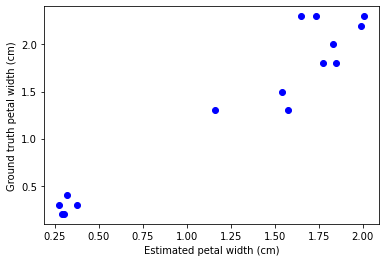

In [59]:
# Plot a graph showing the correlation between the ground truth and estimated values on the validation set
plt.scatter(estimated_petal_width_val, petal_width_val, color = 'blue')
plt.xlabel("Estimated petal width (cm)")
plt.ylabel("Ground truth petal width (cm)")
correlation_coeff = np.corrcoef(estimated_petal_width_val, petal_width_val)
print("Correlation coefficient between the ground truth and estimated petal width is", correlation_coeff[0, 1])
plt.show()